<a href="https://colab.research.google.com/github/andresit02/TALLER-06---ODE/blob/main/%5BTaller_06%5D_ODEd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###****MÉTODOS NUMERICOS****

###****[Taller 06] ODE****
####****Realizado por: Andres Fernandez****

In [3]:
# -*- coding: utf-8 -*-

"""
Python 3
01 / 08 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""

# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())


# ----------------------------- #### --------------------------
from typing import Callable


# ####################################################################
def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Euler method for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h


# ####################################################################
from math import factorial


def ODE_euler_nth(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_derivatives: list[Callable[[float, float], float]],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Taylor method with (m - 1)th derivatives for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``f_derivatives``: list of (m - 1)th derivatives of f
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        T = f(t, y)
        ders = [
            h / factorial(m + 2) * mth_derivative(t, y)
            for m, mth_derivative in enumerate(f_derivatives)
        ]
        T += sum(ders)
        y += h * T
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

****DESARROLLO****

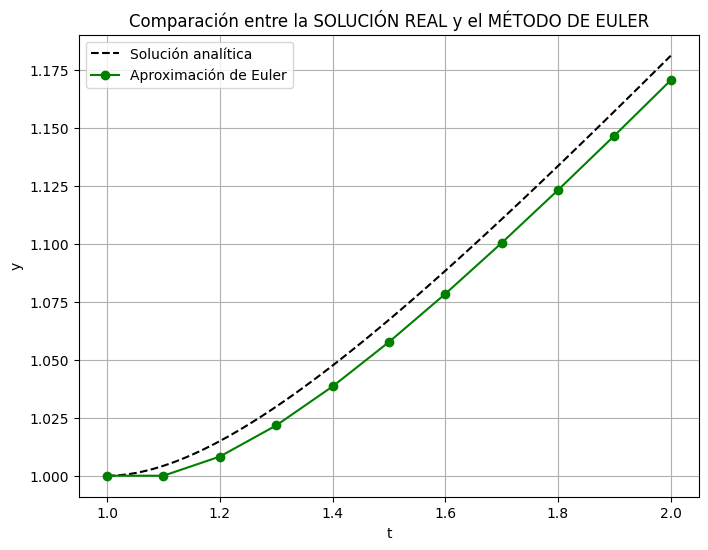

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definir la función diferencial dy/dt = f(t, y)
def ecuacion_diferencial(t: float, y: float) -> float:
    return (y / t) - ((y / t) ** 2)

# Establecer límites de integración y condición inicial
a_inicial = 1
b_final = 2
condicion_inicial_y = 1
pasos = 10

# Resolver la EDO usando el método de Euler
y, t, h = ODE_euler(a=a_inicial, b=b_final, f=ecuacion_diferencial, y_t0=condicion_inicial_y, N=pasos)

# Calcular la solución exacta para comparación
t_exacto = np.linspace(a_inicial, b_final, 100)
y_exacto = [ti / (1 + np.log(ti)) for ti in t_exacto]

# Crear la figura y graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(t_exacto, y_exacto, label="Solución analítica", linestyle="--", color="black")
plt.plot(t, y, label="Aproximación de Euler", marker="o", color="green")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.title("Comparación entre la SOLUCIÓN REAL y el MÉTODO DE EULER")
plt.grid()
plt.show()

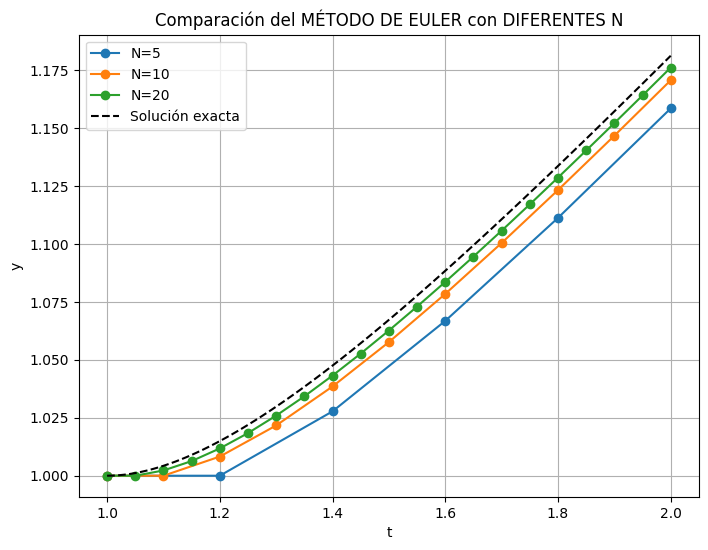

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define los valores de N para comparar
num_pasos = [5, 10, 20]

# Crea una nueva figura para la gráfica
plt.figure(figsize=(8, 6))

# Itera sobre los diferentes valores de N
for n in num_pasos:
    # Calcula la solución numérica usando el método de Euler
    y_aprox, t_aprox, h = ODE_euler(a=a_img, b=b_img, f=f_img, y_t0=y_t0_img, N=n)
    # Grafica la solución obtenida con Euler para el N actual
    plt.plot(t_aprox, y_aprox, marker="o", label=f"N={n}")

# Grafica la solución exacta para comparar
plt.plot(t_exact_img, y_exact_img, label="Solución exacta", linestyle="--", color="black")

# Añade etiquetas y título a la gráfica
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.title("Comparación del MÉTODO DE EULER con DIFERENTES N")

# Muestra la cuadrícula para facilitar la lectura
plt.grid()

# Muestra la gráfica
plt.show()

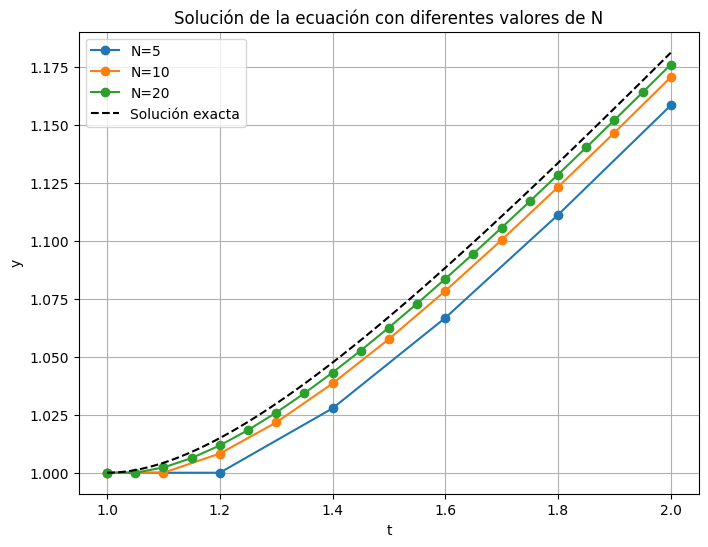

In [20]:
import matplotlib.pyplot as plt

# Configura el tamaño de la figura
plt.figure(figsize=(8, 6))

# Itera sobre los valores de N especificados
for num_steps in N_values:
    # Calcula la solución numérica utilizando el método de Euler
    y_solution, t_solution, step_h = ODE_euler(a=a_img, b=b_img, f=f_img, y_t0=y_t0_img, N=num_steps)
    # Grafica la solución de Euler para el valor actual de N
    plt.plot(t_solution, y_solution, marker="o", label=f"N={num_steps}")

# Grafica la solución exacta para comparar
plt.plot(t_exact_img, y_exact_img, label="Solución exacta", linestyle="--", color="black")

# Añade etiquetas y título a la gráfica
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.title("Solución de la ecuación con diferentes valores de N")

# Muestra la cuadrícula para facilitar la lectura
plt.grid()

# Muestra la gráfica
plt.show()

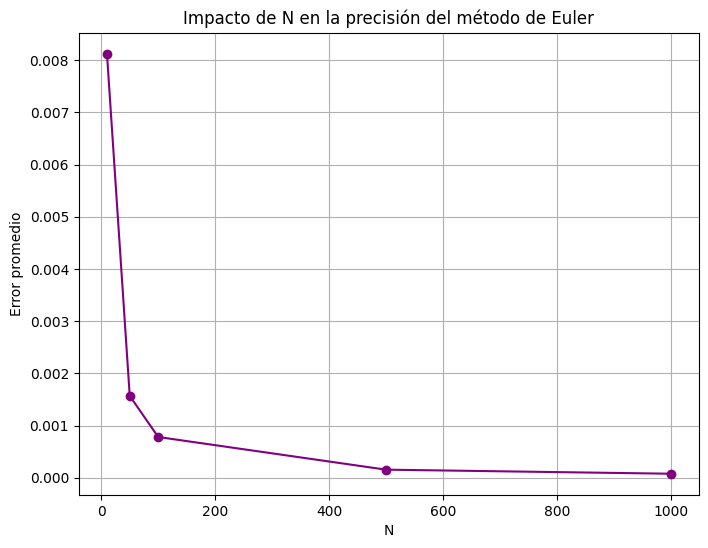

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define los valores de N a evaluar
valores_N_grandes = [10, 50, 100, 500, 1000]
# Inicializa una lista para almacenar los errores
errores = []

# Define la función para calcular la solución exacta
def solucion_exacta(t: float) -> float:
    return t / (1 + np.log(t))

# Itera sobre los valores de N
for N in valores_N_grandes:
    # Calcula la solución numérica con el método de Euler
    y_aproximada, t, h = ODE_euler(a=a_img, b=b_img, f=f_img, y_t0=y_t0_img, N=N)
    # Calcula la solución exacta en los puntos de la solución numérica
    y_exacta = [solucion_exacta(ti) for ti in t]
    # Calcula el error absoluto en cada punto
    error = [abs(yi - y_exact_i) for yi, y_exact_i in zip(y_aproximada, y_exacta)]
    # Calcula el error promedio y lo añade a la lista de errores
    errores.append(sum(error) / len(error))

# Crea la gráfica del error promedio en función de N
plt.figure(figsize=(8, 6))
plt.plot(valores_N_grandes, errores, marker="o", linestyle="-", color="purple")
plt.xlabel("N")
plt.ylabel("Error promedio")
plt.title("Impacto de N en la precisión del método de Euler")
plt.grid()
plt.show()